<a href="https://colab.research.google.com/github/Vaelastraszz/Javascript_Classification/blob/main/Javascript_Code_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ci dessous le projet de NLP proposé par Ponicode et réalisé par Romain Lejeune

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pickle
import nltk

Importation des librairies

In [3]:
pd.set_option('display.max_colwidth', None)
df = pickle.load(open("/content/gdrive/My Drive/Ponicode/anulap.pkl","rb"))

Récupération du dataset et réglages des options d'affichage du dataframe

In [62]:
df.head(5)

,function,types,project,Input_names,Methods,Function_Name
0,"function parseExtensionURL(url) {\n url = url.substring(CRX_BASE_URL.length);\n // Find the (url-encoded) colon and verify that the scheme is whitelisted.\n var schemeIndex = url.search(/:|%3A/i);\n if (schemeIndex === -1) {\n return undefined;\n }\n var scheme = url.slice(0, schemeIndex).toLowerCase();\n if (schemes.includes(scheme)) {\n url = url.split(""#"")[0];\n if (url.charAt(schemeIndex) === "":"") {\n url = encodeURIComponent(url);\n }\n return url;\n }\n return undefined;\n }",string,267,url,"{'url': ['url', 'substring', 'search', 'slice', 'split', 'charat']}",parseExtensionURL
1,"function showPageAction(tabId, displayUrl) {\n // rewriteUrlClosure in viewer.js ensures that the URL looks like\n // chrome-extension://[extensionid]/http://example.com/file.pdf\n var url = /^chrome-extension:\/\/[a-p]{32}\/([^#]+)/.exec(displayUrl);\n if (url) {\n url = url[1];\n chrome.pageAction.setPopup({\n tabId: tabId,\n popup: ""/pageAction/popup.html?file="" + encodeURIComponent(url),\n });\n chrome.pageAction.show(tabId);\n } else {\n console.log(""Unable to get PDF url from "" + displayUrl);\n }\n }","number,string",267,"tabId, displayUrl","{'tabId': ['tabid'], 'displayUrl': ['displayurl']}",showPageAction
2,"function onExecuteFileBrowserHandler(id, details) {\n if (id !== ""open-as-pdf"") {\n return;\n }\n var fileEntries = details.entries;\n // ""tab_id"" is the currently documented format, but it is inconsistent with\n // the other Chrome APIs that use ""tabId"" (http://crbug.com/179767)\n var tabId = details.tab_id || details.tabId;\n if (tabId > 0) {\n chrome.tabs.get(tabId, function(tab) {\n openViewer(tab && tab.windowId, fileEntries);\n });\n } else {\n // Re-use existing window, if available.\n chrome.windows.getLastFocused(function(chromeWindow) {\n var windowId = chromeWindow && chromeWindow.id;\n if (windowId) {\n chrome.windows.update(windowId, { focused: true });\n }\n openViewer(windowId, fileEntries);\n });\n }\n }","string,object",267,"id, details","{'id': ['id'], 'details': ['details', 'entries', 'tab', 'tabid']}",onExecuteFileBrowserHandler
3,"function openViewer(windowId, fileEntries) {\n if (!fileEntries.length) {\n return;\n }\n var fileEntry = fileEntries.shift();\n var url = fileEntry.toURL();\n // Use drive: alias to get shorter (more human-readable) URLs.\n url = url.replace(\n /^filesystem:chrome-extension:\/\/[a-p]{32}\/external\//,\n ""drive:""\n );\n url = getViewerURL(url);\n\n if (windowId) {\n chrome.tabs.create(\n {\n windowId: windowId,\n active: true,\n url: url,\n },\n function() {\n openViewer(windowId, fileEntries);\n }\n );\n } else {\n chrome.windows.create(\n {\n type: ""normal"",\n focused: true,\n url: url,\n },\n function(chromeWindow) {\n openViewer(chromeWindow.id, fileEntries);\n }\n );\n }\n }","number,array",267,"windowId, fileEntries","{'windowId': ['windowid'], 'fileEntries': ['fileentries']}",openViewer
4,"function isPdfDownloadable(details) {\n if (details.url.includes(""pdfjs.action=download"")) {\n return true;\n }\n // Display the PDF viewer regardless of the Content-Disposition header if the\n // file is displayed in the main frame, since most often users want to view\n // a PDF, and servers are often misconfigured.\n // If the query string contains ""=download"", do not unconditionally force the\n // viewer to open the PDF, but first check whether the Content-Disposition\n // header specifies an attachment. This allows sites like Google Drive to\n // operate correctly (#6106).\n if (details.type === ""main_frame"" && !details.url.includes(""=download"")) {\n return false;\n }\n var cdHeader =\n details.responseHeaders &&\n getHeaderFromHeaders(details.responseHeaders, ""content-disposition"");\n return cdHeader && /^attachment/i.test(cdHeader.value);\n}",object,267,details,"{'details': ['details', 'url', 'type', 'responseheaders']}",isPdfDownloadable


# Processing du dataset 

## Check des doublons

In [5]:
duplicates = df[df.function.map(df.function.value_counts() > 1)]
duplicates.sort_values('function')[['function','types', 'project']]

function  ... project
2688                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [6]:
 df.drop_duplicates(['function', 'project', 'types'],inplace=True)

Suppression des doublons sur le contenu de la fonction, le projet et le type

In [7]:
df.shape

(3394, 3)

## Analyse des tags 

### Fréquence des tags sur l'ensemble du dataset

In [8]:
liste_tags = df.types.str.split(",").tolist() # Récupération de la colonne des types sous forme de list of list

In [111]:
def freq_list(liste):
    freq =  nltk.FreqDist()
    
    for i in range(len(liste_tags)):
        
        freq+= nltk.FreqDist([x for x in liste_tags[i]])
        
    return freq

In [112]:
freq = freq_list(liste_tags)

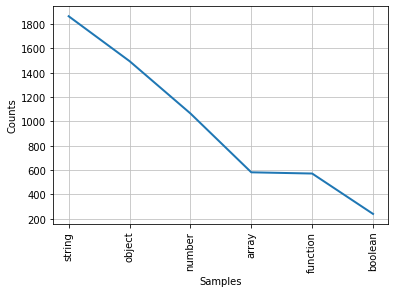

In [113]:
freq.plot() # affichage des fréquences de types dans le dataset

### Number of parameters by function 

In [61]:
def tags_nb_list(liste): #Fonction pour avoir le nb de paramètres par fonction
    
    array_tags = np.ones(len(liste))
    
    for i in range(len(liste)):
        
        array_tags[i] = len(liste[i])
    
    return array_tags

In [62]:
tags_array=tags_nb_list(liste_tags)

In [63]:
pd.DataFrame({"nb_parameters":tags_array}).groupby(["nb_parameters"]).size() # Affichage de la fréquence du nb de paramètres par fonction

nb_parameters
1.0     1912
2.0      919
3.0      365
4.0      114
5.0       33
6.0       26
7.0       18
8.0        3
9.0        2
15.0       1
16.0       1
dtype: int64

### Occurence of variable names 

In [101]:
liste_tags = df.Input_names.str.split(",").tolist() #Récupération du noms des paramètres sous forme de list of list 

In [102]:
freq = freq_list(liste_tags)

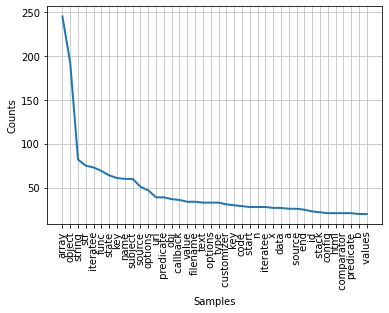

In [103]:
freq.plot(40) # Affichage de la fréquence des noms de variable dans le dataset

In [104]:
freq.B() # Nombre de différents noms de variables dans le dataset

1881

## Getting inputs names 

In [9]:
inputs = df.function.str.split("{").tolist() #Récupérations des noms de variable en séparant la fonction par {}
inputs = [input[0] for input in inputs]

In [10]:
inputs_names = [input[input.find("(")+1:input.find(")")] for input in inputs] #Création de la liste de noms de paramètres

In [11]:
df["Input_names"] = inputs_names #Création d'une colonne Input_names dans le dataframe avec le nom des variables

## Get methods of each inputs in the function

In [13]:
import re #Importation du module d'expression régulière
from string import punctuation

In [14]:
liste_input = df.Input_names.str.split(",").tolist() #Récupération de la liste des noms des Input

In [15]:
def get_method_instr(not_cleared_string, input_name): # Fonction pour récupérer la méthode utilidée String.slice-> slice
    return not_cleared_string[not_cleared_string.find(input_name):]

In [16]:
def get_methods(func, input_list = liste_input): # Méthode pour nettoyer le dataset et récupérer uniquement les méthodes des variables d'entrée de la fonction
    methods = []
    for idx, function in enumerate(func):
        sub_method = [re.findall("[\dA-Za-z\.]*",get_method_instr(element.lstrip(punctuation),input.strip()))[0] for element in function.split() for input in liste_input[idx] if input.strip() + "." in element]
        methods.append(sub_method)                    
    return methods

In [17]:
methods = get_methods(df.function.to_list())

In [70]:
def create_list_hashtable(list_get_methods, input_list= liste_input): # Méthode pour créer par ligne du dataframe un dicitonnaire de type nom_de_variables : [nom_de_variable,méthode1,méthode2]
    
    hash_list = []

    for idx, method in enumerate(list_get_methods):
        
        temp_dict = {}
        
        for input in liste_input[idx]:
            temp_dict[input.strip()] = []
            try :
                if input.strip().lower() not in  temp_dict[input.strip()] :
                    temp_dict[input.strip()].append(input.strip().lower())
                    temp_dict[input.strip()].append("id" + df.project.tolist()[idx])
                for x in method :
                    if x :                       
                        if input.strip().lower() in x and x.split(".")[1] and x.split(".")[1].lower() not in temp_dict[input.strip()]  :                   
                            temp_dict[input.strip()].append(x.split(".")[1].lower())

            except:
                pass

        hash_list.append(temp_dict)

    return hash_list

In [71]:
df["Methods"] = create_list_hashtable(methods) #Création d'une colonne dans le dataframe avec le dictionnaire de méthodes

## Method to get function name and stock it if non existent in hashtable

In [21]:
def get_function_names(functions): #Fonction pour récupérer le nom des fonctions
    function_names = []

    for idx, function in enumerate(functions):
        name = function.split("{")[0]
        name = name.split("(")[0]
        name = name.split(" ")[-1]
        function_names.append(name)
    
    return function_names


In [22]:
def create_hash_function_names(): #Création d'un dictionnaire de type prjet_id : [function_name1,function_name2...]
                                  # Ce dictionnaire sera utilisé ensuite pour vérifier que le nom d'une variable de fonction n'est pas une fonction déja réalisé dans le projet
    function_names = df.Function_Name.to_list()
    project_ids = df.project.to_list()
    hash_func = {}
    
    for id, function in zip(project_ids, function_names):
        hash_func.setdefault(id, [])
        if function and function not in hash_func[id] :
            hash_func[id].append(function)
    
    return hash_func

In [23]:
names = get_function_names(df.function.to_list())

In [24]:
df["Function_Name"] = names #Création d'une colonne dans le dataframe avec le nom des fonctions

In [25]:
function_glossary = create_hash_function_names()

In [26]:
function_glossary["267"] #test du dictionnaire sur le projet_id 267

['parseExtensionURL',
 'showPageAction',
 'onExecuteFileBrowserHandler',
 'openViewer',
 'isPdfDownloadable',
 'isPdfFile',
 'getHeadersWithContentDispositionAttachment',
 'saveReferer',
 'parseResource',
 'getPluralRules',
 'type1FontGlyphMapping',
 'getFilenameFromContentDispositionHeader',
 'arraysToBytes',
 'apiPageLayoutToSpreadMode',
 'apiPageModeToSidebarView',
 'backtrackBeforeAllVisibleElements']

## Affichage du dataset avant preproccessing

In [123]:
df.head(5)

,function,types,project,Input_names,Methods,Function_Name
0,"function parseExtensionURL(url) {\n url = url.substring(CRX_BASE_URL.length);\n // Find the (url-encoded) colon and verify that the scheme is whitelisted.\n var schemeIndex = url.search(/:|%3A/i);\n if (schemeIndex === -1) {\n return undefined;\n }\n var scheme = url.slice(0, schemeIndex).toLowerCase();\n if (schemes.includes(scheme)) {\n url = url.split(""#"")[0];\n if (url.charAt(schemeIndex) === "":"") {\n url = encodeURIComponent(url);\n }\n return url;\n }\n return undefined;\n }",string,267,url,"{'url': ['url', 'id267', 'substring', 'search', 'slice', 'split', 'charat']}",parseExtensionURL
1,"function showPageAction(tabId, displayUrl) {\n // rewriteUrlClosure in viewer.js ensures that the URL looks like\n // chrome-extension://[extensionid]/http://example.com/file.pdf\n var url = /^chrome-extension:\/\/[a-p]{32}\/([^#]+)/.exec(displayUrl);\n if (url) {\n url = url[1];\n chrome.pageAction.setPopup({\n tabId: tabId,\n popup: ""/pageAction/popup.html?file="" + encodeURIComponent(url),\n });\n chrome.pageAction.show(tabId);\n } else {\n console.log(""Unable to get PDF url from "" + displayUrl);\n }\n }","number,string",267,"tabId, displayUrl","{'tabId': ['tabid', 'id267'], 'displayUrl': ['displayurl', 'id267']}",showPageAction
2,"function onExecuteFileBrowserHandler(id, details) {\n if (id !== ""open-as-pdf"") {\n return;\n }\n var fileEntries = details.entries;\n // ""tab_id"" is the currently documented format, but it is inconsistent with\n // the other Chrome APIs that use ""tabId"" (http://crbug.com/179767)\n var tabId = details.tab_id || details.tabId;\n if (tabId > 0) {\n chrome.tabs.get(tabId, function(tab) {\n openViewer(tab && tab.windowId, fileEntries);\n });\n } else {\n // Re-use existing window, if available.\n chrome.windows.getLastFocused(function(chromeWindow) {\n var windowId = chromeWindow && chromeWindow.id;\n if (windowId) {\n chrome.windows.update(windowId, { focused: true });\n }\n openViewer(windowId, fileEntries);\n });\n }\n }","string,object",267,"id, details","{'id': ['id', 'id267'], 'details': ['details', 'id267', 'entries', 'tab', 'tabid']}",onExecuteFileBrowserHandler
3,"function openViewer(windowId, fileEntries) {\n if (!fileEntries.length) {\n return;\n }\n var fileEntry = fileEntries.shift();\n var url = fileEntry.toURL();\n // Use drive: alias to get shorter (more human-readable) URLs.\n url = url.replace(\n /^filesystem:chrome-extension:\/\/[a-p]{32}\/external\//,\n ""drive:""\n );\n url = getViewerURL(url);\n\n if (windowId) {\n chrome.tabs.create(\n {\n windowId: windowId,\n active: true,\n url: url,\n },\n function() {\n openViewer(windowId, fileEntries);\n }\n );\n } else {\n chrome.windows.create(\n {\n type: ""normal"",\n focused: true,\n url: url,\n },\n function(chromeWindow) {\n openViewer(chromeWindow.id, fileEntries);\n }\n );\n }\n }","number,array",267,"windowId, fileEntries","{'windowId': ['windowid', 'id267'], 'fileEntries': ['fileentries', 'id267']}",openViewer
4,"function isPdfDownloadable(details) {\n if (details.url.includes(""pdfjs.action=download"")) {\n return true;\n }\n // Display the PDF viewer regardless of the Content-Disposition header if the\n // file is displayed in the main frame, since most often users want to view\n // a PDF, and servers are often misconfigured.\n // If the query string contains ""=download"", do not unconditionally force the\n // viewer to open the PDF, but first check whether the Content-Disposition\n // header specifies an attachment. This allows sites like Google Drive to\n // operate correctly (#6106).\n if (details.type === ""main_frame"" && !details.url.includes(""=download"")) {\n return false;\n }\n var cdHeader =\n details.responseHeaders &&\n getHeaderFromHeaders(details.responseHeaders, ""content-disposition"");\n return cdHeader && /^attachment/i.test(cdHeader.value);\n}",object,267,details,"{'details': ['details', 'id267', 'url', 'type', 'responseheaders']}",isPdfDown

## Prepare dataset for classification

### Splitting des set 

In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2) #Splitting du dataset en train et test

### Creation du dataset pour l'algo

In [74]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder() #Importation du label encoder pour encoder nos labels ensuite 

In [75]:
def prepare_data(df): #Fonction pour préparer le dataset de manière à avoir une input par ligne avec ses méthodes
                    # et le nom de variable, on va récupérer aussi une liste des noms de variables et de projet id_rattaché à la ligne sachant que les noms de variable sont séparés ligne par ligne
    X = []             # Eg. x = [url, slice, split, ...,id267] y = ["string"] name = ["url"] project_id = [265]
    y = []
    names = []
    project_ids = []

    methods = df.Methods.to_list()
    labels = df.types.str.split(",").to_list()
    old_names = df.Input_names.str.split(",").to_list()
    ids = df.project.to_list()

    for idx, dict_method in enumerate(methods) :
        for key, value in dict_method.items() :
            ix = 0
            if value :
                X.append(value)
                y.append(labels[idx][ix])
                names.append(old_names[idx][ix])
                project_ids.append(ids[idx])

                ix+=1
    
    return X,y,names,project_ids


In [76]:
X_train,y_train,names,project_ids = prepare_data(train)

In [77]:
le.fit(y_train) #Fitting de l'encoder sur le jeu d'entraînement

LabelEncoder()

In [78]:
le.classes_ #Affichage de l'ensemble des classes différentes

array(['array', 'boolean', 'function', 'number', 'object', 'string'],
      dtype='<U8')

In [79]:
y_train_f = le.transform(y_train) #Encoding des labels 

### Processing du jeu d'entraînement

In [80]:
import keras #Importation des packages de deep learning
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [81]:
# Nombre max de mots utilisés -> vocab total
MAX_NB_WORDS = 1800
# Nombre max de mots utilisés par input
MAX_SEQUENCE_LENGTH = 10

In [82]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True) # Tokenizing des input et tout est mis en minuscule meme si c'était déja fait avant
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index # Création de notre hashtable du vocab -> mot : id

In [84]:
print('Found %s unique tokens.' % len(word_index))

Found 1962 unique tokens.


In [85]:
X = tokenizer.texts_to_sequences(X_train) 

In [86]:
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH) #Uniformisation des input (10,len(X_train))

In [87]:
Y = pd.get_dummies(y_train_f) #Hot encoding des labels de sortie

### Model creation : LSTM Neural Net

In [88]:
EMBEDDING_DIM = 100 #Dimesion de l'embedding des mots -> représentation de la phrase sous un vecteur dense de taille 100

In [89]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2)) # Droput pour éviter l'overfitting
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2)) #Layer de LSTM pour conserver une mémoire a long terme sur le dataset pour garder un contexte sur l'ensemble des input
model.add(Dense(len(le.classes_), activation='softmax')) #Couche softmax ou se fera la catégorisation avec nos différentes classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #loss categorical cross entropy typique de multiclassification
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 100)           180000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306       
Total params: 210,506
Trainable params: 210,506
Non-trainable params: 0
_________________________________________________________________
None


### Training du modèle

In [52]:
from keras.callbacks import EarlyStopping # Import du early stopping

In [90]:
epochs = 10 
batch_size = 32
#Entrainement du modèle sur 10 epoche / batch_size de 32 / un jeu de validation de 10% de la taille du training set / Early stopping en cas d'overfitting apres 5 epochs
history = model.fit(X, Y, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)])

Epoch 1/10
133/133 [==============================] - 3s 21ms/step - loss: 1.4273 - accuracy: 0.4280 - val_loss: 1.0863 - val_accuracy: 0.6017
Epoch 2/10
133/133 [==============================] - 2s 18ms/step - loss: 0.8622 - accuracy: 0.7053 - val_loss: 0.7590 - val_accuracy: 0.7161
Epoch 3/10
133/133 [==============================] - 2s 18ms/step - loss: 0.5820 - accuracy: 0.8083 - val_loss: 0.7594 - val_accuracy: 0.7352
Epoch 4/10
133/133 [==============================] - 2s 18ms/step - loss: 0.4430 - accuracy: 0.8562 - val_loss: 0.7652 - val_accuracy: 0.7500
Epoch 5/10
133/133 [==============================] - 2s 18ms/step - loss: 0.3680 - accuracy: 0.8776 - val_loss: 0.7777 - val_accuracy: 0.7585
Epoch 6/10
133/133 [==============================] - 2s 19ms/step - loss: 0.3205 - accuracy: 0.8894 - val_loss: 0.7761 - val_accuracy: 0.7669
Epoch 7/10
133/133 [==============================] - 2s 19ms/step - loss: 0.2903 - accuracy: 0.8972 - val_loss: 0.7626 - val_accuracy: 0.7691

### Plotting Results

In [120]:
acc = history.history['accuracy'] #Récupération des variables d'entrainement pour afficher le graphique durant l'entraînement train et val
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [121]:
epochs = range(1, len(acc)+1)

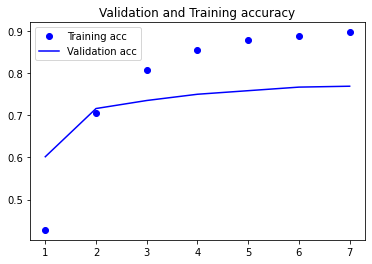

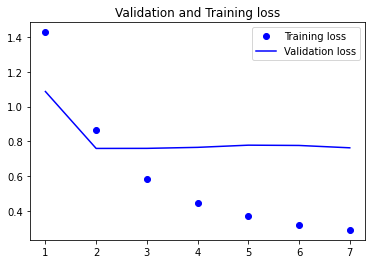

In [122]:
plt.plot(epochs, acc, 'bo', label ='Training acc') #Plot de l'accuracy
plt.plot(epochs, val_acc, 'b', label ='Validation acc')
plt.title("Validation and Training accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label ='Training loss') # Plot des loss
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title("Validation and Training loss")
plt.legend()

plt.show()

## Evaluation du modèle

In [91]:
X_test,y_test,names_f,input_f = prepare_data(test) #Récupération du jeu de test 

In [92]:
y_test_f = le.transform(y_test) #Encoding du label

In [93]:
X_test = tokenizer.texts_to_sequences(X_test) #processing du jeu de test

In [94]:
y_test_f = pd.get_dummies(y_test_f) #Hot encoding des labels

In [95]:
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)

In [96]:
accr = model.evaluate(X_test,y_test_f) #Evaluation du modèle entre prédiction et ground truth
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

35/35 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.7726
Test set
  Loss: 0.679
  Accuracy: 0.773


On peut voir que le modèle a une accuracy de 77,3% ce qui est très honorable sur un jeu de test de multiclassification ou un classifier aléatoire aurait une chance sur 6 de bien classer l'élément soit moins de 20%

In [98]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred = model.predict_classes(X_test)

## Trying On BERT Model

### Preprocessing and downloading for Bert

In [ ]:
!pip install ktrain #Importation du package de Hugging Face pour manipuler les mdoèles de BERT

In [103]:
import ktrain

In [104]:
from ktrain import text

In [105]:
model_name = "distilbert-base-uncased" # Modèle choisi pour la classification

In [106]:
t = text.Transformer(model_name,10, classes = le.classes_) #Création du modèle avec le nom du modèle, le nb de mots pris en compte dans l'input, les classes

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:380: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


In [107]:
Bert_X_train = [" ".join(X) for X in X_train] #Mis en place du jeu d'entrainement sous forme X = ["string slice substring..."]

In [108]:
Bert_X_test,y_test,names_test,ids_test = prepare_data(test)

In [109]:
Bert_X_test = [" ".join(X) for X in Bert_X_test]

In [110]:
trn = t.preprocess_train(Bert_X_train, y_train) #Processing du jeu d'entrainement et de test comme on en a besoin en entrée de BERT
val = t.preprocess_test(Bert_X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 2
	95percentile : 4
	99percentile : 7


/usr/local/lib/python3.6/dist-packages/ktrain/utils.py:573: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 2
	95percentile : 4
	99percentile : 6


### Training Bert

In [111]:
model_bert = t.get_classifier() #Récupération du classifier de bert

In [112]:
learner = ktrain.get_learner(model_bert, train_data = trn, val_data = val, batch_size = 32) #Création des paramètres d'entraînement et wrapping dans le learner

### Finding Learning Rate

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
146/146 [==============================] - 235s 2s/step - loss: 1.6730 - accuracy: 0.2205
Epoch 2/2
146/146 [==============================] - 235s 2s/step - loss: 24.6680 - accuracy: 0.3124


done.
Visually inspect loss plot and select learning rate associated with falling loss


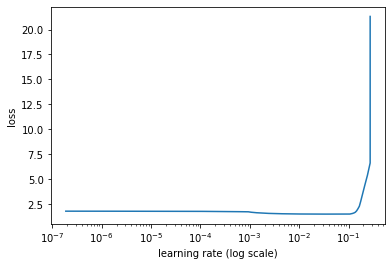

In [254]:
learner.lr_find(show_plot=True, max_epochs = 2) # Recherche du meilleur learning rate pour notre problème on voit mal a cause de l'échelle maisil faut choisir la plus grande variable ou la loss continue de descendre les chercheurs de Google conseillent entre 5e-5 et 2e-5

### Training

In [113]:
learner.fit_onecycle(5e-5,6) #onecycle pour entrapiner le modèle qui permet d'augmenter au début le learning rate comme "warmup" puis reduction du learning rate pour affiner son accuracy



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/6
148/148 [==============================] - 326s 2s/step - loss: 1.4264 - accuracy: 0.4454 - val_loss: 1.0667 - val_accuracy: 0.6309
Epoch 2/6
148/148 [==============================] - 324s 2s/step - loss: 0.8564 - accuracy: 0.7199 - val_loss: 0.7473 - val_accuracy: 0.7383
Epoch 3/6
148/148 [==============================] - 327s 2s/step - loss: 0.6226 - accuracy: 0.7885 - val_loss: 0.6627 - val_accuracy: 0.7735
Epoch 4/6
148/148 [==============================] - 324s 2s/step - loss: 0.4638 - accuracy: 0.8438 - val_loss: 0.5995 - val_accuracy: 0.8105
Epoch 5/6
148/148 [==============================] - 320s 2s/step - loss: 0.3235 - accuracy: 0.8892 - val_loss: 0.6040 - val_accuracy: 0.8096
Epoch 6/6
148/148 [==============================] - 324s 2s/step - loss: 0.2498 - accuracy: 0.9145 - val_loss: 0.6068 - val_accuracy: 0.8150


### Saving the model

In [114]:
predic = ktrain.get_predictor(learner.model, preproc = t) #Récupération de notre predicteur pour le sauvegarder pour pouvoir le recharger si besoin

In [115]:
predic.save("/content/gdrive/My Drive/Ponicode/input_predictor")

In [116]:
predic.predict(Bert_X_test[0]) #Prédiction sur le premier élément du jeu de test par exemple

'function'

## Custom Algorithm for Input prediction

In [117]:
def input_guess(input_test=Bert_X_test, input_name=names_test, project_id=ids_test, dict_func = function_glossary):

    prediction = [] #Ce petit algorithme permet d'optimiser les prédictions sur les fonctions en testant si l'input a le nom d'une fonction présente dans le projet de la fonction qu'on veut tester
                    # Si oui on attribue la classe fonction à l'input si non on la fait passer dans notre modèle entraîné pour prédire sa potentielle classe
    for idx, input in enumerate(input_test) :
        if input_name[idx] in function_glossary[project_id[idx]]:
            prediction.append("function")
        else:
            prediction.append(predic.predict(input))
    
    return le.transform(prediction)

In [118]:
bert_pred = input_guess()

## Models Comparisons 

### Classifiers Reports

<u> BERT classifier 

In [119]:
print(classification_report(le.transform(y_test), bert_pred, target_names= le.classes_))

              precision    recall  f1-score   support

       array       0.84      0.77      0.80       178
     boolean       0.85      0.73      0.79        15
    function       0.53      0.64      0.58        50
      number       0.75      0.83      0.79       162
      object       0.80      0.77      0.78       309
      string       0.86      0.86      0.86       394

    accuracy                           0.80      1108
   macro avg       0.77      0.77      0.77      1108
weighted avg       0.81      0.80      0.81      1108



<u> LSTM Classifier

In [101]:
print(classification_report(le.transform(y_test), y_pred, target_names= le.classes_))

              precision    recall  f1-score   support

       array       0.86      0.74      0.80       178
     boolean       1.00      0.60      0.75        15
    function       0.67      0.56      0.61        50
      number       0.71      0.77      0.74       162
      object       0.78      0.75      0.76       309
      string       0.77      0.84      0.80       394

    accuracy                           0.77      1108
   macro avg       0.80      0.71      0.74      1108
weighted avg       0.78      0.77      0.77      1108



En comparant les deux modèles on peut voir que le modèle de BERT qui est dans l'état de l'art du NLP est plus performant que notre LSTM entraîné "from scratch" sous tous les points. On aurait pu tester sur un modèle de machine learning classique mais on se doute que les résultats auraient été moins bon que sur ces deux tests de deep learning on aurait pu perdre la compréhension du contexte entre les différentes observations qui passent dans le modèle. Pour les deux modèles on peut voir que les classes sont plutôt bien identifiées, les deux modèles sont assez performants.

# Perspective d'améliorations

## Bilan du projet et intérêt

- Grace a ce petit test j'ai pu voir l'intérêt d'une telle tâche pour Ponicode afin de générer des test unitaires pertinents grace à un algorithme de qualité pour identifier correctement les inputs et pouvoir proposer des assertions cohérentes.

- L'enjeu serait possiblement aussi de suggérer des noms de variables lors de la création des fonctions afin de pouvoir ainsi optimiser l'efficacité du modèle

- Des noms de variables ambigus ou mal choisi pourraient complètement biaiser le modèle et pourrait de plus donner de meilleures pratiques au développeur dans son travail plutôt que donner de mauvais noms de variables par facilité.


## Traitement des Inputs en pre-processing :

On peut veut voir dans le dataset qu'il est difficile de récupérer une autre information que l'id du projet et du nom de la variable pour les booléens, le problème est qu'il est difficile sur beaucoup de fonctions de récupérer des features intéressantes sur les paramètres booleens :

- Peut-être trouver si la variable à un true ou false juste à coté cependant en regardant j'ai vu certains objets qui ont aussi la valeur true ou false 

- Vérifier sur un pattern avec Is devant car les booléen ont souvent IsTrue ou IsNumber etc, cependant il est possible qu'une fonction renvoyant un booléen ait aussi ce nom ce qui pourrait créer de la confusion au modèle

- Le problème peut être aussi lié au fait que le nombre de booléen en input est minoritaire par rapport aux autres classes une idée serait d'apporter plus d'observations avec des booléen en input

Une autre piste d'améliorations pourrait être sur les numbers :

- Récupérer les opérateurs liés uniquement au number comme >, <, -, / on ne pourra pas se fier au + et === qui fonctionnent aussi sur les strings et donc pourrait détériorer la qualité du modèle
